In [42]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy. First, we import both of these libraries:

In [43]:
import pandas as pd
import numpy as np

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [44]:
# Defines an n-dimensional array (ndarray) with 10,000 random numbers in the range [0-500).
values1 = np.random.randint(500, size=10000) 

# Defines a pandas Series similar to the above ndarray.
values2 = pd.Series(np.random.randint(500, size=10000)) 

pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series):

In [45]:
values1[:10]

array([447, 285,  37,   1, 130, 244, 223, 390,  37,  69])

In [46]:
values2[-10:]

9990    208
9991    224
9992    220
9993    340
9994    360
9995    475
9996    146
9997    253
9998    317
9999    410
dtype: int64

Built-in methods are available for all basic statistics. Some are demonstrated below:

In [47]:
print ('MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min())) # minimum value in the list
print ('MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max())) # maximum value
print ('RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(values2.ptp())) # the range of the values
print ('MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean())) # the mean of the values
print ('STD(values1) = ' + str(values1.std()) + '\t\tSTD(values2) = ' + str(values2.std())) # the standard deviation of the values
print ('VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var())) # the variance of 

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 253.5148		MEAN(values2) = 248.9297
STD(values1) = 144.82897838816652		STD(values2) = 143.82592793952267
VARIANCE(values1) = 20975.432980960002	VARIANCE(values2) = 20685.897547664765


Additionally, pandas series have a method called *describe()* that returns a nice summary of these basic statistics.

In [48]:
values2.describe()

count    10000.000000
mean       248.929700
std        143.825928
min          0.000000
25%        126.000000
50%        248.000000
75%        373.000000
max        499.000000
dtype: float64

For non-numerical series objects, *describe()* will return a simple summary of the number of unique values and most frequently occurring ones.

In [49]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [50]:
s

0      a
1      a
2      b
3      b
4      a
5      a
6    NaN
7      c
8      d
9      a
dtype: object

In [51]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas has great support for missing data. For full documentation, [check this page](http://pandas.pydata.org/pandas-docs/dev/missing_data.html). Below are a few examples of how to work with missing data using pandas. First, we create a pandas DataFrame with 5 rows and 3 columns and fill it with random numbers:

In [52]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [53]:
df

,one,two,three
a,0.214722,0.397863,-0.299140
c,-0.065276,-0.137135,1.308753
e,1.128554,-0.194852,-0.251667
f,0.459268,1.752747,1.051785
h,-0.743669,-0.304859,-0.706787


Next, we add two more columns, named 'four' and 'five':

In [54]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [55]:
df

,one,two,three,four,five
a,0.214722,0.397863,-0.299140,bar,True
c,-0.065276,-0.137135,1.308753,bar,False
e,1.128554,-0.194852,-0.251667,bar,True
f,0.459268,1.752747,1.051785,bar,True
h,-0.743669,-0.304859,-0.706787,bar,False


Adding new rows is also simple. Below we include three extra empty rows:

In [56]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,0.214722,0.397863,-0.299140,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.065276,-0.137135,1.308753,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.128554,-0.194852,-0.251667,bar,True
f,0.459268,1.752747,1.051785,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.743669,-0.304859,-0.706787,bar,False


In [57]:
#This is one way to index a column in pandas
df2['one']

a    0.214722
b         NaN
c   -0.065276
d         NaN
e    1.128554
f    0.459268
g         NaN
h   -0.743669
Name: one, dtype: float64

In [58]:
#This is one way to index a row in pandas
df2.loc['a']

one      0.214722
two      0.397863
three    -0.29914
four          bar
five         True
Name: a, dtype: object

pandas has two functions *isnull()* and *notnull()* that return boolean objects when called.

In [59]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [60]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [61]:
a = df[['one','two']]
a.loc[['a','c'],'one'] = float('nan')
a

,one,two
a,NaN,0.397863
c,NaN,-0.137135
e,1.128554,-0.194852
f,0.459268,1.752747
h,-0.743669,-0.304859


In [62]:
b = df[['one','two']]
b

,one,two
a,0.214722,0.397863
c,-0.065276,-0.137135
e,1.128554,-0.194852
f,0.459268,1.752747
h,-0.743669,-0.304859


In [63]:
a * b

,one,two
a,NaN,0.158295
c,NaN,0.018806
e,1.273634,0.037967
f,0.210927,3.072121
h,0.553043,0.092939


In [64]:
a['one'].dropna()

e    1.128554
f    0.459268
h   -0.743669
Name: one, dtype: float64

In pandas, summary statistics all account for missing values. 

*   When summing data, NA (missing) values will be treated as zero
*   If the data are all NA, the result will be NA
*   Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [65]:
a

,one,two
a,NaN,0.397863
c,NaN,-0.137135
e,1.128554,-0.194852
f,0.459268,1.752747
h,-0.743669,-0.304859


In [66]:
a['one'].sum()

0.8441529721898515

In [67]:
a.mean(1)

a    0.397863
c   -0.137135
e    0.466851
f    1.106007
h   -0.524264
dtype: float64

In [68]:
values2

0       415
1       236
2       320
3       119
4       151
5       333
6        54
7       240
8       115
9       141
10       20
11      492
12      279
13      113
14      223
15      189
16      247
17      188
18      365
19        7
20       69
21      306
22      198
23        7
24      168
25      397
26      102
27      256
28      184
29      282
       ... 
9970    406
9971    442
9972    329
9973    443
9974    446
9975    478
9976    102
9977     95
9978     32
9979    304
9980    122
9981      2
9982    122
9983    226
9984    271
9985    439
9986     25
9987    412
9988    282
9989     56
9990    208
9991    224
9992    220
9993    340
9994    360
9995    475
9996    146
9997    253
9998    317
9999    410
Length: 10000, dtype: int64

*This is just the bare minimum. pandas has a lot more missing data functionality.*

## Histograms

#### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above *values2* series, we can simply call the *hist()* method.

<span style="color:red"> If your kernal is died die to Intel MKL FATAL ERROR: Cannot load libmkl_core.dylib, please install mkl lib in the environment.</span>
    
<span style="color:green"> CMD : conda install mkl </span>

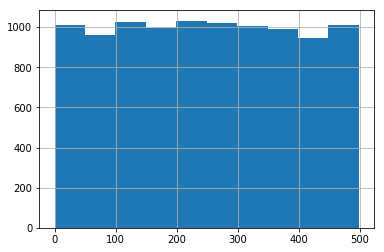

In [69]:
pdhist = values2.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

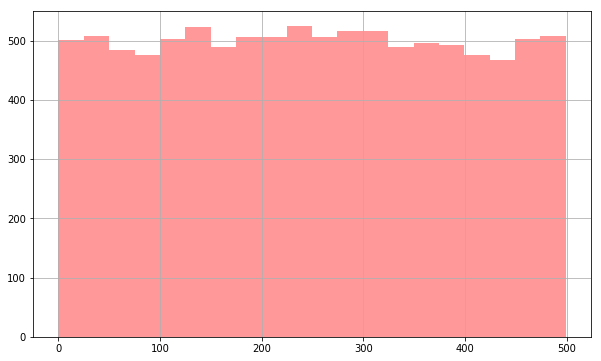

In [70]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

#### Using NumPy + matplotlib

While the pandas data structure has a method that automatically wraps around a call to the *hist()* method of the plotting library Matplotlib, we can achieve the same result by performing that call manually on our *values1* ndarray.

In [71]:
import matplotlib.pyplot as plt # Required for plotting

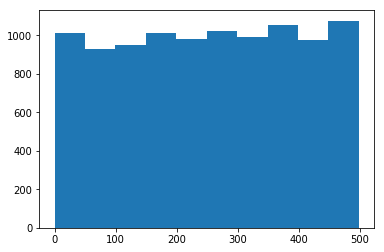

In [72]:
nphist = plt.hist(values1)

## Boxplots

#### Using pandas

pandas DataFrames have a boxplot method that allows you to visualize the distribution of values within each column.

In [73]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )

In [74]:
df.head()

,Col1,Col2
0,0.842597,0.162235
1,0.295245,0.956429
2,0.642061,0.018262
3,0.412249,0.487113
4,0.906083,0.872668


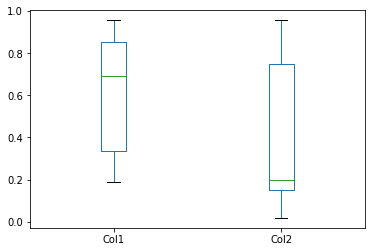

In [75]:
box = df.boxplot(grid=False, return_type='axes')

#### Using NumPy + matplotlib

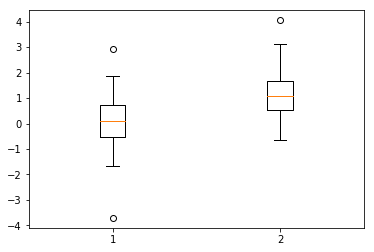

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

## Scatterplots

#### Using pandas

Let's define a dataframe containing 2 columns, each with 200 random numbers < 1.

In [77]:
df = pd.DataFrame(rand(200,2))

In [78]:
df.head()

,0,1
0,0.806270,0.916263
1,0.357107,0.707347
2,0.750044,0.102512
3,0.673234,0.172308
4,0.605641,0.359397


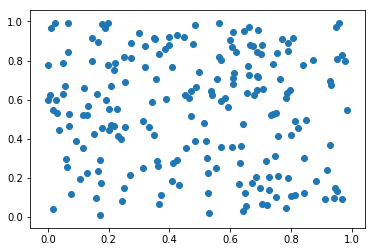

In [79]:
pdscatter = plt.scatter(df[0], df[1])

#### Using NumPy + matplotlib

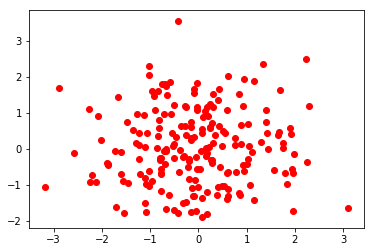

In [80]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')